# Assignment 16 - Neural Netwroks (Forest Fires)

**Problem statement:**

Predict the burnt area of forest fires with Neural Networks.

*Dataset: forestfires.csv*

### Importing required libraries:

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
!pip install scikeras

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import random
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

### Importing the dataset:

In [5]:
data = pd.read_csv("C:\\Users\\DELL\\Desktop\\ExcelR DS Assignments\\Assignment 16 - Neural Netwroks\\forestfires.csv", delimiter = ",")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Performing EDA:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [8]:
data.shape

(517, 31)

In [9]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [12]:
data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [13]:
data[data.duplicated()].sum()

month                            augaugmarjunaugaugaugaug
day                              wedsunsatfrithusattuefri
FFMC                                                738.7
DMC                                                1211.0
DC                                                 4461.1
ISI                                                  71.2
temp                                                163.2
RH                                                    372
wind                                                 35.3
rain                                                  0.8
area                                                28.66
dayfri                                                  2
daymon                                                  0
daysat                                                  2
daysun                                                  1
daythu                                                  1
daytue                                                  1
daywed        

In [14]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
data = data.drop_duplicates()
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [16]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

In [17]:
data=data.drop(['month','day'],axis=1)

In [18]:
mapping = {'small': 1, 'large': 2}

In [19]:
data = data.replace(mapping)

### Data Visualisation:

In [20]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444,0.024292
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779,0.046598
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299,0.028372
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600,-0.007867
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428,0.009976
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631,-0.039730
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211,0.059513
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319,0.053463
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191,0.310561
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903,-0.017980


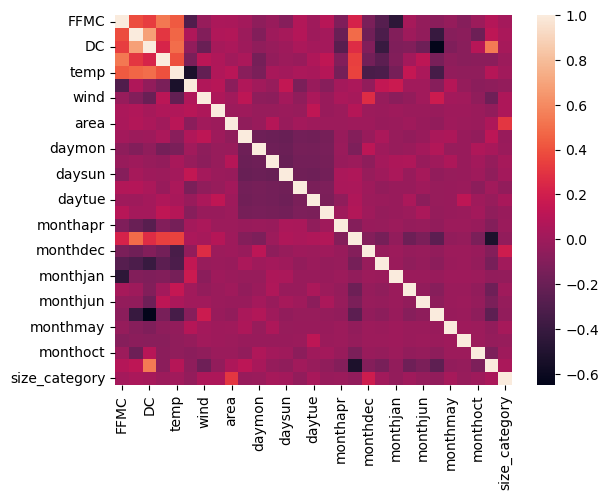

In [21]:
sns.heatmap(data.corr())
plt.show()

### Model Building:

In [22]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
x_norm = norm_func(x)

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [26]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 1s 14ms/step - loss: 0.6209 - accuracy: 0.5739 - val_loss: 0.5274 - val_accuracy: 0.7724
Epoch 2/120
29/29 [==============================] - 0s 5ms/step - loss: 0.3989 - accuracy: 0.7113 - val_loss: 0.3275 - val_accuracy: 0.7724
Epoch 3/120
29/29 [==============================] - 0s 5ms/step - loss: 0.1793 - accuracy: 0.7113 - val_loss: 0.1342 - val_accuracy: 0.7724
Epoch 4/120
29/29 [==============================] - 0s 6ms/step - loss: -0.0276 - accuracy: 0.7113 - val_loss: -0.0439 - val_accuracy: 0.7724
Epoch 5/120
29/29 [==============================] - 0s 5ms/step - loss: -0.2110 - accuracy: 0.7113 - val_loss: -0.1871 - val_accuracy: 0.7724
Epoch 6/120
29/29 [==============================] - 0s 6ms/step - loss: -0.3654 - accuracy: 0.7113 - val_loss: -0.3079 - val_accuracy: 0.7724
Epoch 7/120
29/29 [==============================] - 0s 6ms/step - loss: -0.4946 - accuracy: 0.7113 - val_loss: -0.4128 - val_accuracy: 0.7724
Epoc

In [29]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: -4.7673 - accuracy: 0.7297
accuracy: 72.97%


In [30]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: -4.8421 - accuracy: 0.7255
accuracy: 72.55%


In [31]:
history.history

{'loss': [0.6208888292312622,
  0.3988538384437561,
  0.17928987741470337,
  -0.027631135657429695,
  -0.2109837830066681,
  -0.36541521549224854,
  -0.494578093290329,
  -0.6080924272537231,
  -0.7018426060676575,
  -0.7832024693489075,
  -0.8547706604003906,
  -0.9202203750610352,
  -0.9775890111923218,
  -1.031747579574585,
  -1.081756830215454,
  -1.1296234130859375,
  -1.1751868724822998,
  -1.219962477684021,
  -1.2639586925506592,
  -1.3066319227218628,
  -1.34935462474823,
  -1.3901187181472778,
  -1.430678129196167,
  -1.4705406427383423,
  -1.511221170425415,
  -1.5512335300445557,
  -1.5887914896011353,
  -1.6283284425735474,
  -1.6660220623016357,
  -1.7052186727523804,
  -1.7438709735870361,
  -1.7823665142059326,
  -1.8201048374176025,
  -1.8570588827133179,
  -1.895271897315979,
  -1.9320833683013916,
  -1.9710444211959839,
  -2.0071659088134766,
  -2.0464444160461426,
  -2.0838754177093506,
  -2.1217916011810303,
  -2.1595561504364014,
  -2.197260856628418,
  -2.2345428

In [32]:
#Visualize training history

#list all data in history

model.history.history.keys()

dict_keys([])

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

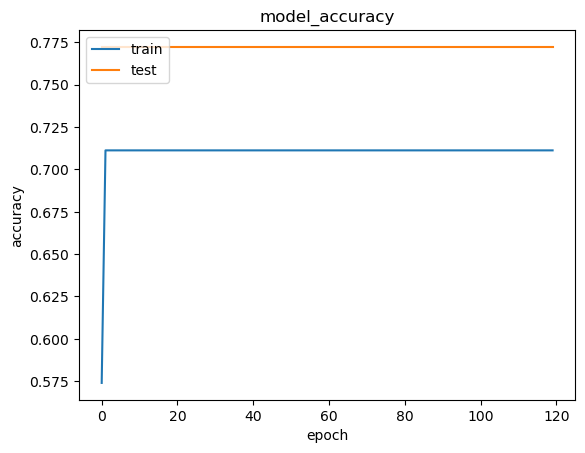

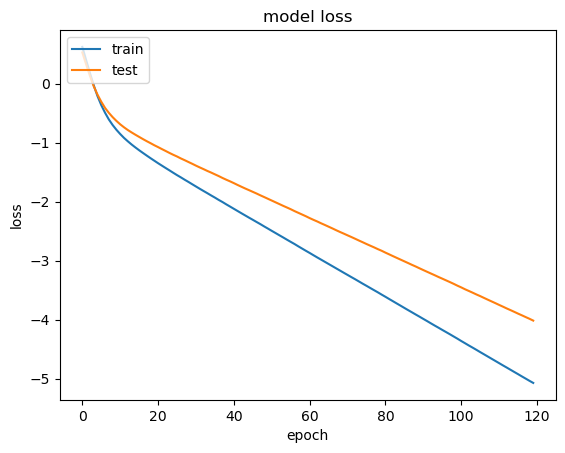

In [34]:
#Summarize history for accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()